# This is a toy example that leverages sklearn `make_moons` function to visualize kNN clustering algorithm #

### 1. Necessary imports ###

In [34]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.metrics import mean_squared_error
from sklearn import metrics

### 2. Data generation and visualization ###

In [2]:
X,Y = make_moons(n_samples=1000, shuffle=True, noise=0.25) # Returns features and labels

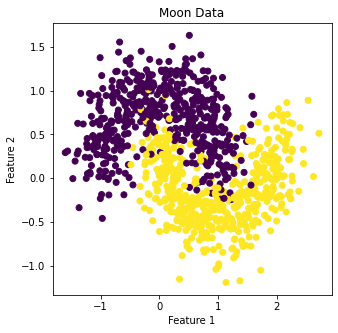

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('Moon Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### 3. Split up data for training and testing ###

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [21]:
def print_info_about_split_data(X_train, X_test, Y_train, Y_test, X, Y):
    # This function prints information about the train and test data
    # that hev been generated by train_test_split
    r,c = X_train.shape
    r_orig,c_orig = X.shape
    perc_of_train = round((r/r_orig)*100, 2)
    print(f'Shape of train data: {r, c}, i.e. {perc_of_train}%')
    min_train = np.min(X_train)
    max_train = np.max(X_train)
    print(f'  Range of train data: min {min_train}   max {max_train}')
    r,c = X_test.shape
    perc_of_test = round((r/r_orig)*100, 2)
    print(f'Shape of test data: {r, c}, i.e. {perc_of_test}%')
    min_test = np.min(X_test)
    max_test = np.max(X_test)
    print(f'  Range of train data: min {min_test}   max {max_test}')
    unq_labels = np.unique(Y)
    print(f'Unique labels in entire data: {unq_labels}')
    for iter in unq_labels:
        no_of_train = len(Y_train[Y_train == iter])
        perc_of_train = round((no_of_train/len(Y_train))*100, 2)
        print(f'Number of data points in train data with label={iter} are {no_of_train}, i.e. {perc_of_train}%')
        no_of_test = len(Y_test[Y_test == iter])
        perc_of_test = round((no_of_test/len(Y_test))*100, 2)
        print(f'Number of data points in test data with label={iter} are {no_of_test}, i.e. {perc_of_test}%')

In [22]:
print_info_about_split_data(X_train, X_test, Y_train, Y_test, X, Y)

Shape of train data: (750, 2), i.e. 75.0%
  Range of train data: min -1.6010000973841039   max 2.717496590659669
Shape of test data: (250, 2), i.e. 25.0%
  Range of train data: min -1.5611062615507327   max 2.4507375094933606
Unique labels in entire data: [0 1]
Number of data points in train data with label=0 are 367, i.e. 48.93%
Number of data points in test data with label=0 are 133, i.e. 53.2%
Number of data points in train data with label=1 are 383, i.e. 51.07%
Number of data points in test data with label=1 are 117, i.e. 46.8%


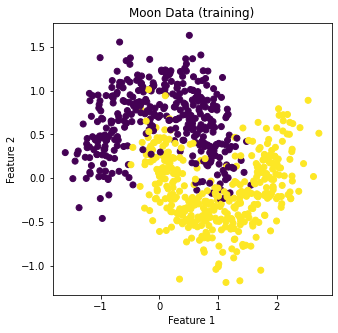

In [7]:
plt.figure(figsize=(5,5))
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train)
plt.title('Moon Data (training)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

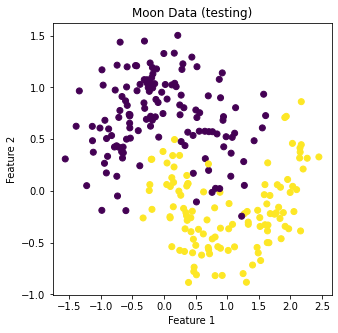

In [8]:
plt.figure(figsize=(5,5))
plt.scatter(X_test[:,0], X_test[:,1], c=Y_test)
plt.title('Moon Data (testing)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### 4. Splitting up the train data for training and cross validation ###

In [42]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [43]:
print_info_about_split_data(X_train, X_val, Y_train, Y_val, X, Y)

Shape of train data: (600, 2), i.e. 60.0%
  Range of train data: min -1.6010000973841039   max 2.717496590659669
Shape of test data: (150, 2), i.e. 15.0%
  Range of train data: min -1.4716171921995747   max 2.222819042067584
Unique labels in entire data: [0 1]
Number of data points in train data with label=0 are 289, i.e. 48.17%
Number of data points in test data with label=0 are 78, i.e. 52.0%
Number of data points in train data with label=1 are 311, i.e. 51.83%
Number of data points in test data with label=1 are 72, i.e. 48.0%


### 5. Getting optimal value of k for kNN classifier and applying it to test data ###

In [44]:
def compute_optimal_k(X_train, X_test, Y_train, Y_test):
    '''
        This function computes the optimal 'k' for the KNN algorithm
        The 'k' corresponds to the number of neighbors we must consider
        to calculate the maximum vote for a new data point. The 'k' must
        reduce the error on our test data and it must also correspond to
        high accuracy
    '''
    optimalK = None
    values_of_k = range(1, 20)
    err_rate = []
    accuracy = []
    
    for iter in values_of_k:
        neigh_test = KNeighborsClassifier(n_neighbors=iter)
        neigh_test.fit(X_train, Y_train)
        predictions_test = neigh_test.predict(X_test)
        err_rate.append(np.mean(predictions_test != Y_test))
        accuracy.append(metrics.accuracy_score(predictions_test, Y_test))
    
    plt.figure(figsize=(5,5))
    plt.plot(values_of_k, err_rate)
    plt.title('Impact of k on error rate')
    plt.xlabel('Values of k')
    plt.ylabel('Error rate')
    plt.show()
    min_err_idx = err_rate.index(min(err_rate))
    print(f'Min value is at index {min_err_idx}, i.e. k={values_of_k[min_err_idx]}')
    plt.figure(figsize=(5,5))
    plt.plot(values_of_k, accuracy)
    plt.title('Impact of k on accuracy')
    plt.xlabel('Values of k')
    plt.ylabel('Accuracy')
    plt.show()
    max_acc_idx = accuracy.index(max(accuracy))
    print(f'Max accuracy is at index {max_acc_idx}, i.e. k={values_of_k[max_acc_idx]}')
    assert max_acc_idx == min_err_idx, "Min error index is not max accuracy index"
    optimalK = values_of_k[max_acc_idx]
    return optimalK

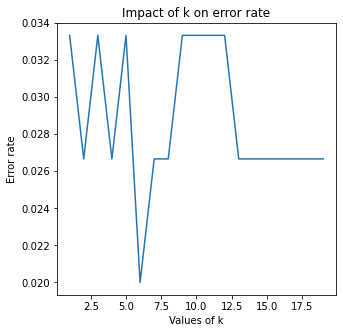

Min value is at index 5, i.e. k=6


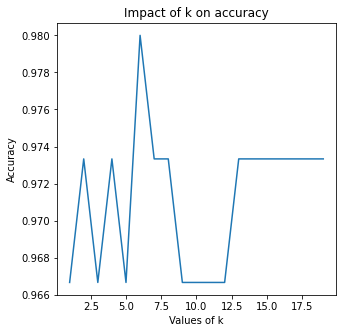

Max accuracy is at index 5, i.e. k=6
Accuracy is 0.964


In [45]:
# We compute optimal valu eof 'k' using the cross-validation dataset
k = compute_optimal_k(X_train, X_val, Y_train, Y_val)
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train, Y_train)

# We then test our model on the test data
predictions = neigh.predict(X_test)
print(f'Accuracy is {metrics.accuracy_score(predictions, Y_test)}')

In [46]:
def evaluate(test_preds, test_labels):
    # calculate true positives, false positives, true negatives, false negatives
    tp = np.logical_and(test_labels, test_preds).sum()
    fp = np.logical_and(1-test_labels, test_preds).sum()
    tn = np.logical_and(1-test_labels, 1-test_preds).sum()
    fn = np.logical_and(test_labels, 1-test_preds).sum()
    
    # calculate binary classification metrics
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    accuracy = (tp + tn) / (tp + fp + tn + fn)
        
    return {'TP': tp, 'FP': fp, 'FN': fn, 'TN': tn, 
            'Precision': precision, 'Recall': recall, 'Accuracy': accuracy}

In [49]:
# Get information about misclassification
evaluate(predictions, Y_test)

{'TP': 116,
 'FP': 8,
 'FN': 1,
 'TN': 125,
 'Precision': 0.9354838709677419,
 'Recall': 0.9914529914529915,
 'Accuracy': 0.964}

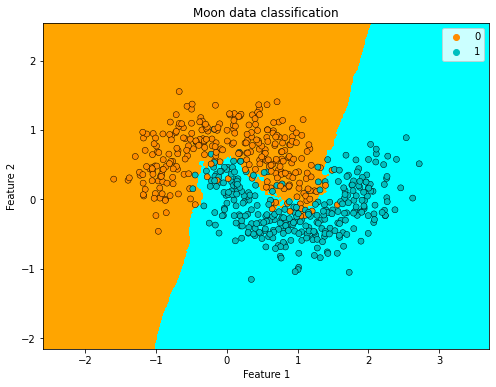

In [48]:
# Plot the decision boundary learnt by kNN (sklearn documentation)
cmap_light = ListedColormap(['orange', 'cyan'])
cmap_bold = ['darkorange', 'c']

# Generating a mesh of data points using the training data with a step size of 0.01
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=Y_train, palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Moon data classification")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()